In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)

Mounted at /content/gdrive


In [ ]:
data_dir = '/content/gdrive/MyDrive/KDSH Data/btc_3m.csv'
df=pd.read_csv(data_dir)

In [ ]:
df.head()

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13666.11,13680.00,6.303815
1,2018-01-01 05:33:00,13679.98,13679.98,13554.44,13568.00,33.709206
2,2018-01-01 05:36:00,13568.00,13575.00,13501.01,13575.00,29.645987
3,2018-01-01 05:39:00,13539.99,13575.00,13400.01,13515.26,30.696039
4,2018-01-01 05:42:00,13515.26,13568.66,13473.47,13556.15,23.260966


In [ ]:
df.tail()

,datetime,open,high,low,close,volume
713012,2022-01-31 05:18:00,37919.05,37919.05,37876.94,37891.30,30.71790
713013,2022-01-31 05:21:00,37891.30,37946.56,37870.00,37918.80,28.36942
713014,2022-01-31 05:24:00,37918.79,37948.79,37888.88,37898.01,22.34601
713015,2022-01-31 05:27:00,37898.02,37945.25,37870.00,37881.76,42.83873
713016,2022-01-31 05:30:00,37881.75,37951.07,37880.00,37919.12,55.69696


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713017 entries, 0 to 713016
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  713017 non-null  object 
 1   open      713017 non-null  float64
 2   high      713017 non-null  float64
 3   low       713017 non-null  float64
 4   close     713017 non-null  float64
 5   volume    713017 non-null  float64
dtypes: float64(5), object(1)
memory usage: 32.6+ MB


In [ ]:
df.describe()

,open,high,low,close,volume
count,713017.000000,713017.000000,713017.000000,713017.000000,713017.000000
mean,18807.323944,18831.272011,18782.884174,18807.356373,113.791132
std,17870.632088,17893.686239,17847.464655,17870.647886,153.718050
min,3160.000000,3164.870000,3156.260000,3162.070000,0.000000
25%,7134.890000,7141.140000,7128.080000,7134.960000,41.807979
50%,9532.520000,9541.530000,9522.850000,9532.590000,72.168931
75%,32660.490000,32720.780000,32601.910000,32660.420000,128.161217
max,68766.780000,69000.000000,68610.640000,68766.770000,5508.384762


In [ ]:
df['datetime']=pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)


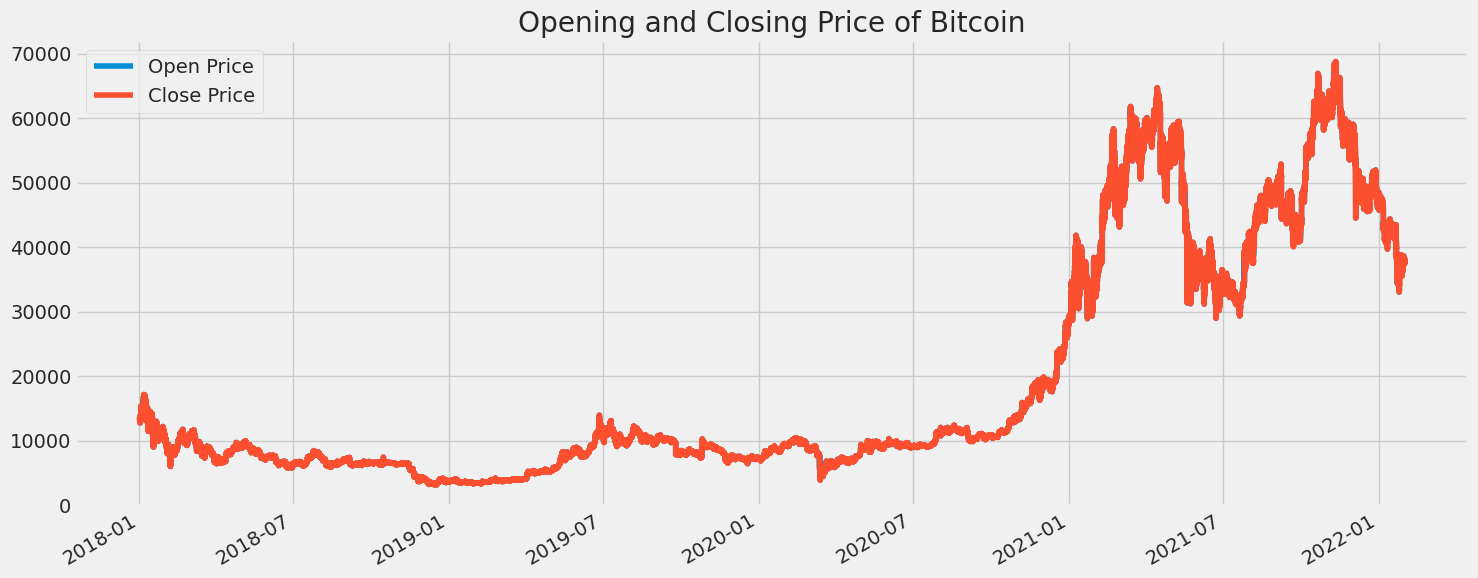

In [ ]:
plt.figure(figsize=(15,6))
df[r'open'].plot()
df[r'close'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('Opening and Closing Price of Bitcoin')
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()

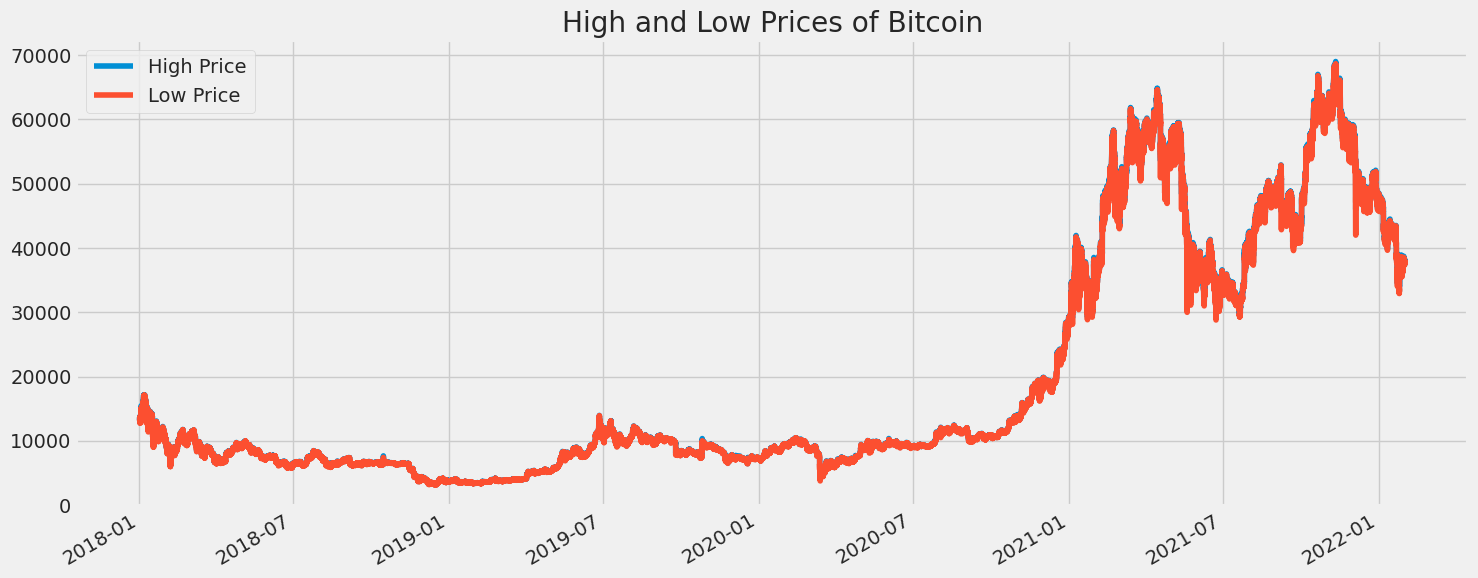

In [ ]:
plt.figure(figsize=(15,6))
df[r'high'].plot()
df[r'low'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('High and Low Prices of Bitcoin')
plt.legend(['High Price', 'Low Price'])
plt.tight_layout()
plt.show()

In [ ]:
n_cols=1
dataset=df[r'close']
dataset=pd.DataFrame(dataset)
data=dataset.values
data.shape

(713017, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(np.array(data))

In [ ]:
train_size=int(len(data)*0.75)
test_size=len(data)-train_size
train_data=scaled_data[0:train_size,:]
train_data.shape

(534762, 1)

In [ ]:
x_train=[]
y_train=[]
time_steps=60
n_cols=1
for i in range(time_steps, len(train_data)):
  x_train.append(train_data[i-time_steps:i,:n_cols])
  y_train.append(train_data[i,:n_cols])
  if i<=time_steps:
    print('X_train:',x_train)
    print('Y_train:',y_train)

X_train: [array([[0.16032281],
       [0.15861562],
       [0.15872232],
       [0.15781171],
       [0.15843499],
       [0.156665  ],
       [0.15666469],
       [0.15666469],
       [0.1575756 ],
       [0.15790103],
       [0.15816946],
       [0.15802862],
       [0.15757911],
       [0.15757865],
       [0.15712807],
       [0.15835451],
       [0.1581126 ],
       [0.15831381],
       [0.15773153],
       [0.1580213 ],
       [0.15805133],
       [0.15774449],
       [0.15686269],
       [0.15712167],
       [0.15675035],
       [0.15745854],
       [0.15876805],
       [0.15888999],
       [0.15861973],
       [0.15849367],
       [0.15803395],
       [0.15788396],
       [0.15788351],
       [0.1568319 ],
       [0.15666469],
       [0.15575911],
       [0.15605483],
       [0.15491161],
       [0.15346995],
       [0.15305291],
       [0.15479485],
       [0.15605483],
       [0.15453054],
       [0.1553032 ],
       [0.15585667],
       [0.15517013],
       [0.15386657],
   

In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],n_cols))
x_train.shape,y_train.shape

((534702, 60, 1), (534702, 1))

In [ ]:
model=Sequential([
    LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],n_cols)),
    LSTM(64,return_sequences=False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])
model.compile(optimizer='adam',loss='mse',metrics='mean_absolute_error',run_eagerly=True)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42465 (165.88 KB)
Trainable params: 42465 (165.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history=model.fit(x_train,y_train,epochs=100,batch_size=5014)

Epoch 1/100


107/107 [==============================] - 12s 79ms/step - loss: 3.8332e-04 - mean_absolute_error: 0.0081
Epoch 2/100
107/107 [==============================] - 8s 77ms/step - loss: 8.4999e-07 - mean_absolute_error: 4.6594e-04
Epoch 3/100
107/107 [==============================] - 9s 80ms/step - loss: 8.1733e-07 - mean_absolute_error: 4.2639e-04
Epoch 4/100
107/107 [==============================] - 8s 77ms/step - loss: 8.1378e-07 - mean_absolute_error: 4.2415e-04
Epoch 5/100
107/107 [==============================] - 8s 78ms/step - loss: 8.1020e-07 - mean_absolute_error: 4.2302e-04
Epoch 6/100
107/107 [==============================] - 8s 77ms/step - loss: 8.0584e-07 - mean_absolute_error: 4.2169e-04
Epoch 7/100
107/107 [==============================] - 9s 85ms/step - loss: 8.0231e-07 - mean_absolute_error: 4.2173e-04
Epoch 8/100
107/107 [==============================] - 9s 85ms/step - loss: 8.0032e-07 - mean_absolute_error: 4.2188e-04
Epoch 9/100
107/107 [==========================

In [ ]:
from keras.models import model_from_json

json_file_path = 'model (2).json'
with open(json_file_path, 'r') as json_file:
    loaded_model_json = json_file.read()

model = model_from_json(loaded_model_json)

history = model.load_weights("weights (2).h5")
print("Loaded model from disk")


Loaded model from disk


In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
time_steps=60
test_data=scaled_data[train_size-time_steps:,:]
x_test=[]
y_test=[]
n_cols=1
for i in range(time_steps,len(test_data)):
  x_test.append(test_data[i-time_steps:i,0:n_cols])
  y_test.append(test_data[i,0:n_cols])
x_test, y_test=np.array(x_test),np.array(y_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],n_cols))

In [ ]:
x_test.shape, y_test.shape

((178255, 60, 1), (178255, 1))

In [ ]:
predictions=model.predict(x_test)

5571/5571 [==============================] - 21s 4ms/step


In [ ]:
predictions=scaler.inverse_transform(predictions)
predictions.shape

(178255, 1)

In [ ]:
y_test=scaler.inverse_transform(y_test)
rmse=np.sqrt(np.mean(y_test - predictions)**2).round(2)
rmse

171.61

In [ ]:
preds_acts=pd.DataFrame(data={'Predictions':predictions.flatten(),'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,32012.875000,32096.38
1,32009.615234,32033.02
2,31997.386719,32037.94
3,31985.712891,32049.97
4,31979.609375,32000.00
...,...,...
178250,37846.238281,37891.30
178251,37825.414062,37918.80
178252,37815.019531,37898.01
178253,37806.878906,37881.76


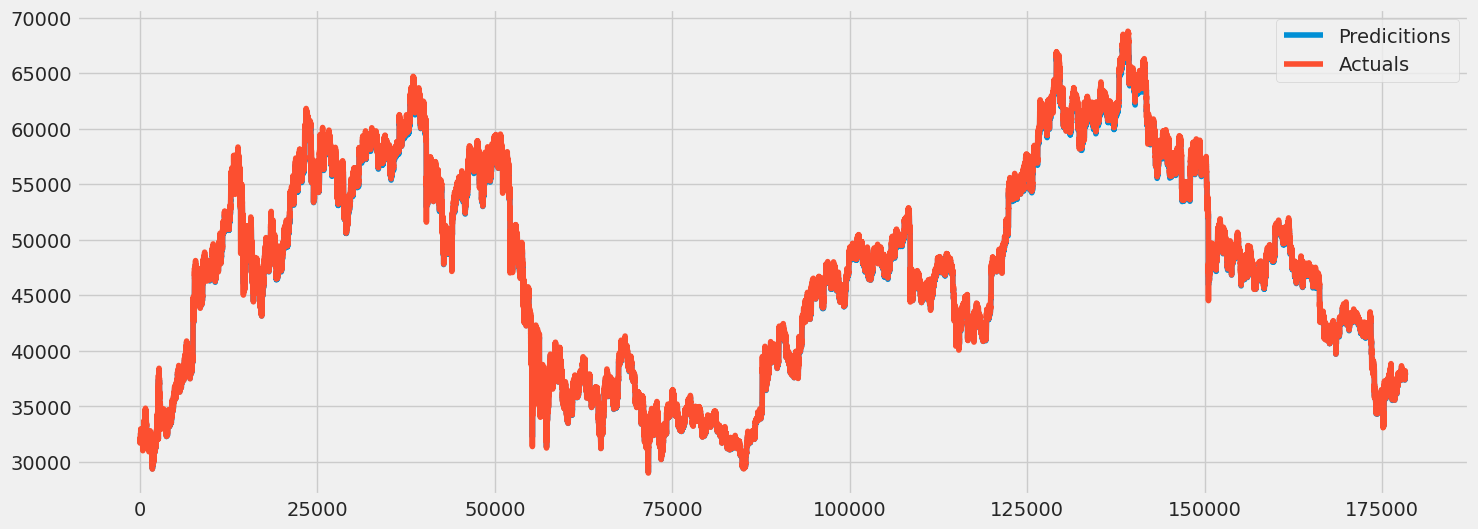

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predicitions','Actuals'])
plt.show()

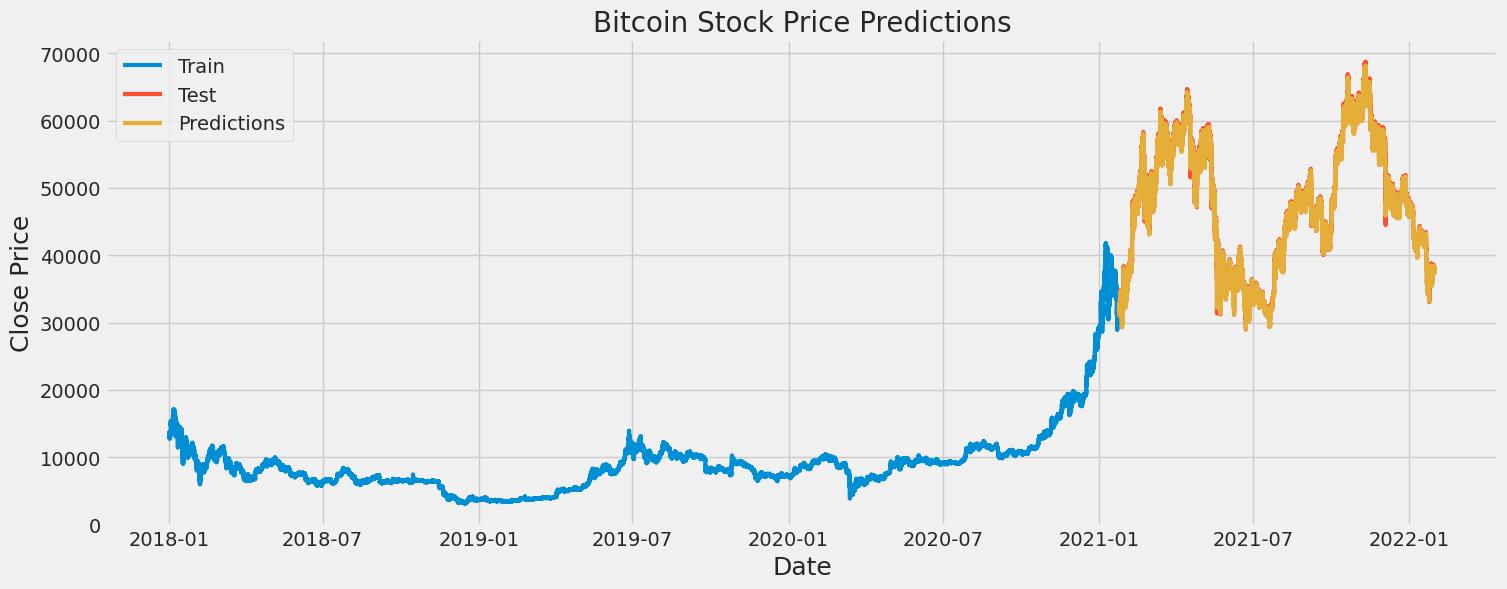

In [ ]:
train=dataset.iloc[:train_size,0:1]
test=dataset.iloc[train_size:,0:1]
test['Predictions']=predictions
plt.figure(figsize=(16,6))
plt.title('Bitcoin Stock Price Predictions',fontsize=20)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(train[r'close'],linewidth=3)
plt.plot(test[r'close'],linewidth=3)
plt.plot(test['Predictions'],linewidth=3)
plt.legend(['Train','Test','Predictions'])


Total Return: 18.14%
Annualized Return: 0.02%
Annualized Volatility: 3.37%
Sharpe Ratio: 0.0070
Maximum Drawdown: 55.22%


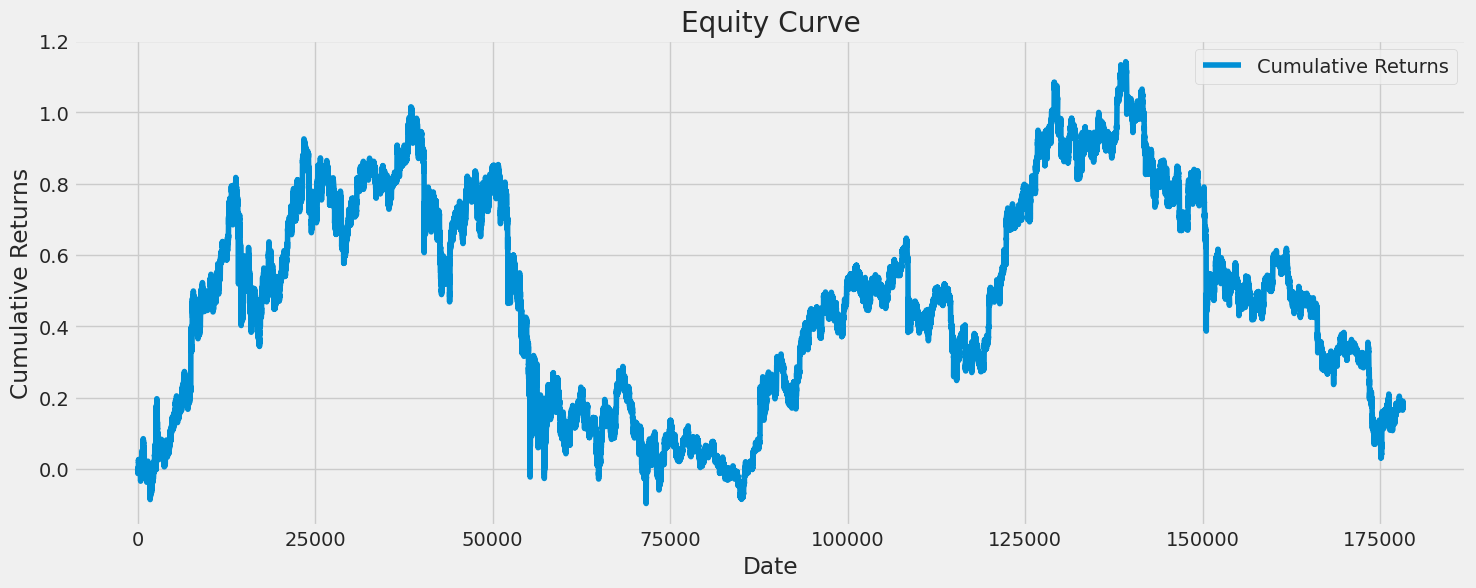

In [49]:
initial_capital = 100000
transaction_cost = 0.0015
slippage = 0.0015

portfolio_value = initial_capital
cash = initial_capital

for i in range(len(test)):
    if predictions[i] > 0.0:
        cash -= test['close'].iloc[i] * (1 + slippage) * (1 + transaction_cost)
    elif predictions[i] < 0.0:
        cash += test['close'].iloc[i] * (1 - slippage) * (1 - transaction_cost)

    portfolio_value = cash + (test['close'].iloc[i] * (initial_capital - cash))

preds_acts['Daily Returns'] = preds_acts['Actuals'].pct_change()

preds_acts['Cumulative Returns'] = (1 + preds_acts['Daily Returns']).cumprod() - 1

total_return = preds_acts['Cumulative Returns'].iloc[-1]

annualized_return = (1 + total_return) ** (252 / len(preds_acts)) - 1
annualized_volatility = np.std(preds_acts['Daily Returns']) * np.sqrt(252)

sharpe_ratio = annualized_return / annualized_volatility

cumulative_returns = (1 + preds_acts['Daily Returns']).cumprod()
peak = cumulative_returns.cummax()
drawdown = (cumulative_returns - peak) / peak
max_drawdown = abs(drawdown.min())

print(f'Total Return: {total_return:.2%}')
print(f'Annualized Return: {annualized_return:.2%}')
print(f'Annualized Volatility: {annualized_volatility:.2%}')
print(f'Sharpe Ratio: {sharpe_ratio:.4f}')
print(f'Maximum Drawdown: {max_drawdown:.2%}')

plt.figure(figsize=(16, 6))
plt.plot(preds_acts['Cumulative Returns'], label='Cumulative Returns')
plt.title('Equity Curve')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import datetime
test_stock_data = yf.download('BTC-USD', start=datetime.datetime(2022, 1, 1), end=datetime.datetime(2024,1,1))

[*********************100%%**********************]  1 of 1 completed


In [ ]:
test_stock_data_processed = test_stock_data.iloc[:, 1:2].values

In [ ]:
all_stock_data = pd.concat((df['close'], test_stock_data['Close']), axis = 0)

In [ ]:
inputs = all_stock_data[len(all_stock_data) - len(test_stock_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [ ]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])

In [ ]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

23/23 [==============================] - 0s 5ms/step


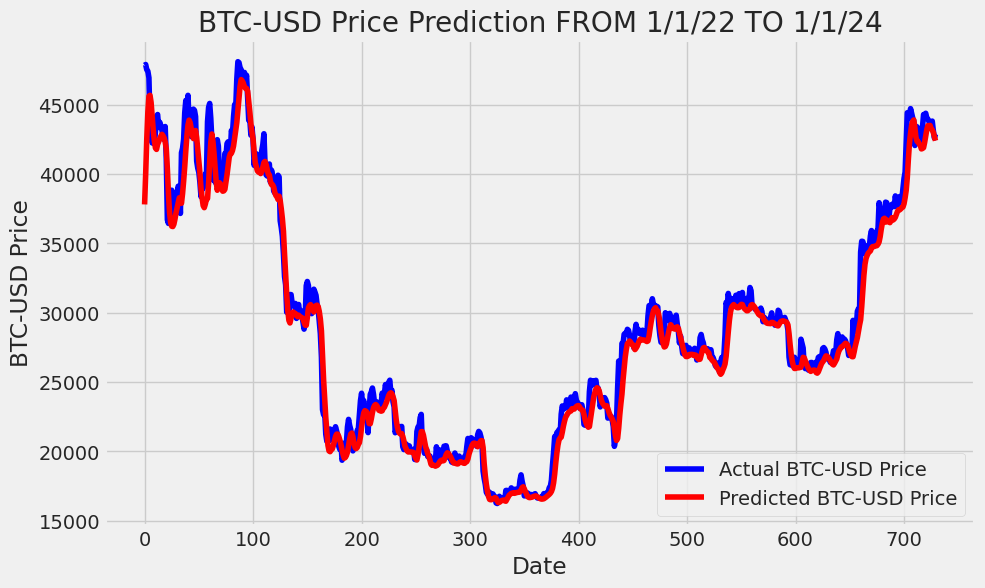

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(test_stock_data_processed, color='blue', label='Actual BTC-USD Price')
plt.plot(predicted_stock_price , color='red', label='Predicted BTC-USD Price')
plt.title('BTC-USD Price Prediction FROM 1/1/22 TO 1/1/24')
plt.xlabel('Date')
plt.ylabel('BTC-USD Price')
plt.legend()
plt.show()

In [52]:
import numpy as np

actual_data = test_stock_data['Close'].values
predicted_data = predicted_stock_price.flatten()

invested_amount = 100000

daily_returns = np.diff(actual_data) / actual_data[:-1]

trade_directions = np.sign(predicted_data[1:] - predicted_data[:-1])

trade_returns = trade_directions * daily_returns

gross_profit = np.sum(np.maximum(0, trade_returns)) * invested_amount
gross_loss = np.sum(np.maximum(0, -trade_returns)) * invested_amount
net_profit = gross_profit - gross_loss
total_closed_trades = np.sum(trade_directions != 0)
winning_trades = np.sum(trade_returns > 0)
win_rate = winning_trades / total_closed_trades * 100 if total_closed_trades > 0 else 0
max_drawdown = abs(np.min(np.cumsum(trade_returns)))
average_winning_trade = gross_profit / winning_trades if winning_trades > 0 else 0
average_losing_trade = gross_loss / (total_closed_trades - winning_trades) if total_closed_trades - winning_trades > 0 else 0
buy_and_hold_return = (actual_data[-1] - actual_data[0]) / actual_data[0] * 100
largest_losing_trade = np.min(trade_returns) * invested_amount
largest_winning_trade = np.max(trade_returns) * invested_amount
sharpe_ratio = abs(np.mean(trade_returns) / np.std(trade_returns))
sortino_ratio = abs(np.mean(trade_returns) / np.std(np.minimum(0, trade_returns)))
average_holding_duration = total_closed_trades / len(actual_data)
max_dip = np.min(np.cumsum(np.minimum(0, trade_returns)))
average_dip = np.mean(np.cumsum(np.minimum(0, trade_returns)))

print("Gross Profit:", gross_profit)
print("Net Profit:", net_profit)
print("Total Closed Trades:", total_closed_trades)
print("Win Rate (Profitability %):", win_rate)
print("Max Drawdown:", max_drawdown)
print("Gross Loss:", gross_loss)
print("Average Winning Trade (in USDT):", average_winning_trade)
print("Average Losing Trade (in USDT):", average_losing_trade)
print("Buy and Hold Return of BTC:", buy_and_hold_return)
print("Largest Losing Trade (in USDT):", largest_losing_trade)
print("Largest Winning Trade (in USDT):", largest_winning_trade)
print("Sharpe Ratio:", sharpe_ratio)
print("Sortino Ratio:", sortino_ratio)
print("Average Holding Duration per Trade:", average_holding_duration)
print("Max Dip in Running Trade:", max_dip)
print("Average Dip in Running Trade:", average_dip)


Gross Profit: 672800.0827940726
Net Profit: -29689.80180519563
Total Closed Trades: 729
Win Rate (Profitability %): 43.895747599451305
Max Drawdown: 0.7586850511757554
Gross Loss: 702489.8845992682
Average Winning Trade (in USDT): 2102.5002587314766
Average Losing Trade (in USDT): 1717.579179949311
Buy and Hold Return of BTC: -11.369233370336925
Largest Losing Trade (in USDT): -11697.806610007297
Largest Winning Trade (in USDT): 15974.726027617198
Sharpe Ratio: 0.014226571563827844
Sortino Ratio: 0.024614365120412453
Average Holding Duration per Trade: 0.9986301369863013
Max Dip in Running Trade: -7.0248988459926744
Average Dip in Running Trade: -4.047788438496201


In [51]:
initial_capital = 100000
transaction_cost = 0.0015
slippage = 0.0015

actual_prices = test_stock_data['Close'].values
predicted_stock_price = model.predict(X_test).reshape(-1)

short_window = 50
long_window = 200

actual_prices_short_ma = np.convolve(actual_prices, np.ones(short_window) / short_window, mode='full')[:len(actual_prices)]
actual_prices_long_ma = np.convolve(actual_prices, np.ones(long_window) / long_window, mode='full')[:len(actual_prices)]

min_length = min(len(actual_prices_short_ma), len(actual_prices_long_ma), len(actual_prices))
actual_prices_short_ma = actual_prices_short_ma[:min_length]
actual_prices_long_ma = actual_prices_long_ma[:min_length]

signals = np.zeros_like(actual_prices, dtype=int)
signals[short_window-1:] = np.where(actual_prices_short_ma[short_window-1:] > actual_prices_long_ma[short_window-1:], 1, -1)

trade_prices = np.zeros_like(actual_prices)
trade_prices[signals == 1] = actual_prices[signals == 1] * (1 - slippage)
trade_prices[signals == -1] = actual_prices[signals == -1] * (1 + slippage)

portfolio_value = np.zeros_like(actual_prices)
portfolio_value[0] = initial_capital

holdings = np.zeros_like(actual_prices)
holdings[0] = 0

transaction_costs = np.abs(np.diff(holdings)) * trade_prices[1:] * transaction_cost
slippage_costs = np.abs(np.diff(holdings)) * trade_prices[1:] * slippage
total_costs = transaction_costs + slippage_costs

gross_profit = np.sum(np.maximum(0, np.diff(trade_prices)))
gross_loss = np.sum(np.maximum(0, trade_prices[1:] - actual_prices[:-1]) * holdings[:-1])
net_profit = gross_profit - total_costs.sum()

total_closed_trades = np.count_nonzero(np.diff(signals))

winning_trades = np.sum(np.diff(signals) == 2)
win_rate = winning_trades / max(1, total_closed_trades) * 100 if total_closed_trades > 0 else 0

cumulative_returns = np.cumsum(np.diff(actual_prices) / actual_prices[:-1] * holdings[:-1])
max_drawdown = np.min(cumulative_returns - np.maximum.accumulate(cumulative_returns))

average_winning_trade = gross_profit / max(1, np.count_nonzero(gross_profit))
average_losing_trade = gross_loss / max(1, np.count_nonzero(gross_loss))

buy_and_hold_return = (actual_prices[-1] - actual_prices[0]) / actual_prices[0] * 100

largest_winning_trade = np.max(gross_profit)
largest_losing_trade = np.max(gross_loss)

risk_free_rate = 0
sharpe_ratio = abs((np.mean(cumulative_returns - risk_free_rate) / max(1, np.std(cumulative_returns - risk_free_rate))) * np.sqrt(252))

downside_returns = np.where(cumulative_returns < 0, cumulative_returns, 0)
sortino_ratio = abs((np.mean(cumulative_returns - risk_free_rate) / max(1, np.std(downside_returns))) * np.sqrt(252) if np.std(downside_returns) > 0 else 0)

average_holding_duration = 0

drawdowns = np.maximum.accumulate(cumulative_returns) - cumulative_returns
max_dip_in_running_trade = np.max(drawdowns)
average_dip_in_running_trade = np.mean(drawdowns)

print("Gross Profit:", gross_profit)
print("Net Profit:", net_profit)
print("Total Closed Trades:", total_closed_trades)
print("Win Rate (Profitability %):", win_rate)
print("Max Drawdown:", max_drawdown)
print("Gross Loss:", gross_loss)
print("Average Winning Trade (in USDT):", average_winning_trade)
print("Average Losing Trade (in USDT):", average_losing_trade)
print("Buy and Hold Return of BTC:", buy_and_hold_return)
print("Largest Losing Trade (in USDT):", largest_losing_trade)
print("Largest Winning Trade (in USDT):", largest_winning_trade)
print("Sharpe Ratio:", sharpe_ratio)
print("Sortino Ratio:", sortino_ratio)
print("Average Holding Duration per Trade:", average_holding_duration)
print("Max Dip in Running Trade:", max_dip_in_running_trade)
print("Average Dip in Running Trade:", average_dip_in_running_trade)

23/23 [==============================] - 0s 4ms/step
Gross Profit: 218604.4154755859
Net Profit: 218604.4154755859
Total Closed Trades: 5
Win Rate (Profitability %): 40.0
Max Drawdown: 0.0
Gross Loss: 0.0
Average Winning Trade (in USDT): 218604.4154755859
Average Losing Trade (in USDT): 0.0
Buy and Hold Return of BTC: -11.369233370336925
Largest Losing Trade (in USDT): 0.0
Largest Winning Trade (in USDT): 218604.4154755859
Sharpe Ratio: 0.0
Sortino Ratio: 0
Average Holding Duration per Trade: 0
Max Dip in Running Trade: 0.0
Average Dip in Running Trade: 0.0


In [ ]:
!pip install shap


ERROR: Could not find a version that satisfies the requirement shap_lstm (from versions: none)
ERROR: No matching distribution found for shap_lstm


In [ ]:
import shap

features = ['Open', 'High', 'Low', 'Volume']

explainer = shap.create_explainer(model, X_test)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [ ]:
# Download model and weights
from google.colab import files

model_json = model.to_json()

with open("model.json", "w") as json_file:
  json_file.write(model_json)

files.download("model.json")

model.save('weights.h5')
files.download('weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>